In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.manifold import Isomap
from sklearn.metrics.pairwise import pairwise_distances



from astropy.io import ascii
from utils import col_names, normalise_sdss_class, ellipticity, filling_factor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
relevant_indices = [6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [3]:
datasets = "../datasets/SuperCOSMOS/"

#load data
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat", guess=False, Reader=ascii.FastNoHeader).to_pandas()

#Get relevant column names
colnames_relevant=[col_names[i] for i in relevant_indices]

#Get Relevant columns
data=uki823_df.iloc[:, relevant_indices]

#Create data framhttp://localhost:8888/notebooks/Masters/DME/Project/dme-mini-project/notebooks/classification_with_cols_19_21.ipynb#e
data = pd.DataFrame(data.values, columns = colnames_relevant)   

#Add in ellipticity, filling factor and normalise CLASS_SDSS
data['Ellipticity']=  ellipticity(uki823_df.iloc[:,15],uki823_df.iloc[:,16])
data['Filling Factor']= filling_factor(data['AREA'], uki823_df.iloc[:,12],uki823_df.iloc[:,13])
data=normalise_sdss_class(data)

#One Hot Encode

In [4]:
enc = OneHotEncoder()
X=enc.fit_transform(data['CLASS'].values.reshape(-1,1)).toarray()


C:\Users\jsmyt\Anaconda3\envs\dme_project\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
dfOneHot = pd.DataFrame(X, columns = ["Class_"+str(int(i)) for i in range(X.shape[1])])
data['CLASS']

0        2.0
1        1.0
2        2.0
3        2.0
4        2.0
5        2.0
6        1.0
7        2.0
8        1.0
9        1.0
10       2.0
11       1.0
12       2.0
13       1.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       1.0
22       1.0
23       2.0
24       1.0
25       2.0
26       2.0
27       2.0
28       1.0
29       2.0
        ... 
15615    1.0
15616    1.0
15617    1.0
15618    1.0
15619    1.0
15620    1.0
15621    2.0
15622    1.0
15623    1.0
15624    1.0
15625    2.0
15626    1.0
15627    2.0
15628    1.0
15629    2.0
15630    1.0
15631    1.0
15632    1.0
15633    1.0
15634    1.0
15635    2.0
15636    1.0
15637    1.0
15638    2.0
15639    1.0
15640    1.0
15641    2.0
15642    1.0
15643    2.0
15644    1.0
Name: CLASS, Length: 15645, dtype: float64

In [6]:
dfOneHot

,Class_0,Class_1,Class_2,Class_3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [7]:
data = pd.concat([data, dfOneHot], axis=1)
#Remove Col class
data = data.drop("CLASS", axis=1) 


In [8]:
#Seperate data into variables and classification
data_x=data.loc[:,data.columns!='CLASS_SDSS']
data_y=data['CLASS_SDSS']

In [9]:
any(np.isinf(data_x['Filling Factor']))

False

In [10]:
#Split dataset into train, val, test
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import log_loss

X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.1,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=2./9,random_state=1)

sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

random_state = 1

In [11]:
# X_train_sc=bwe_data_train
# X_val_sc=bwe_data_val

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score,roc_auc_score

names = ["Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(max_iter=1000, random_state=random_state)]

ca_score = {} # Classification accuracy
F1_scores = {} #F1 scores

for name, clf in zip(names, classifiers):
    clf.fit(X_train_sc, y_train)
    ca_score[name] = clf.score(X_val_sc, y_val)
    F1_scores[name] = f1_score(y_val,clf.predict(X_val_sc),average='macro')
    
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, f1-score: {:.3f}".format(clf, ca_score[clf],F1_scores[clf]))

#Cross Validated Backwards Elimination using SVM




Optimal number of features : 17


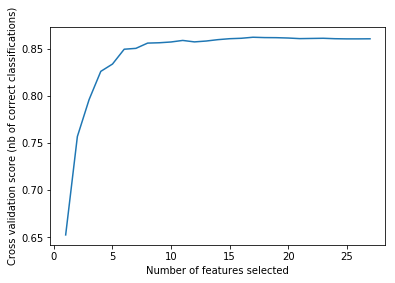

In [11]:

# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                            n_redundant=2, n_repeated=0, n_classes=8,
#                            n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train_sc, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
# rfecv.ranking_ gives indexes which are kept

In [24]:
#Get indices of most important variables
ind_list=[]
for i in range(len(X_train.columns)):
    if rfecv.ranking_[i] == 1:
        ind_list.append(i)

bwe_data_train=X_train_sc[:,ind_list]
bwe_data_val=X_val_sc[:,ind_list]
bwe_data_test=X_test_sc[:,ind_list]

#Do classification using features selected with backwards elimination

In [ ]:


names = ["Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(max_iter=1000, random_state=random_state)]

ca_score = {} # Classification accuracy
F1_scores = {} #F1 scores

for name, clf in zip(names, classifiers):
    clf.fit(bwe_data_train, y_train)
    ca_score[name] = clf.score(bwe_data_val, y_val)
    F1_scores[name] = f1_score(y_val,clf.predict(bwe_data_val),average='macro')
    
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, f1-score: {:.3f}".format(clf, ca_score[clf],F1_scores[clf]))

Try dimensionality reduction with Isomap


In [ ]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

Tune hyperparameters of a MLP classifier

In [18]:
# Your code goes here
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=3, shuffle=True, random_state=random_state)
mlp_clf = MLPClassifier(random_state=random_state)

def objective_mlp(params):
    number_hidden_units, alpha = params

    mlp_clf.set_params(hidden_layer_sizes = (number_hidden_units,),
                      alpha=alpha)

    return -np.mean(cross_val_score(mlp_clf, X_train_sc, y_train, cv=cv, n_jobs=-1,
                                    scoring="accuracy"))

space  = [(10, 1000),                       # number of hidden units
          (10**-8, 1)]                      # alpha
x0 = [100, 10**-4]

In [19]:
from skopt import gp_minimize

res_gp = gp_minimize(objective_mlp, space, x0=x0, n_calls=25, random_state=random_state, n_random_starts=5)
print("Best score with Bayesian optimisation: {:.3f}".format(res_gp.fun))
print("Best parameters with Bayesian optimisation:\n-hidden layer size: ({},)\n-alpha: {}"
      .format(res_gp.x[0],res_gp.x[1]))

Best score with Bayesian optimisation: -0.889
Best parameters with Bayesian optimisation:
-hidden layer size: (32,)
-alpha: 0.0013355668851875754


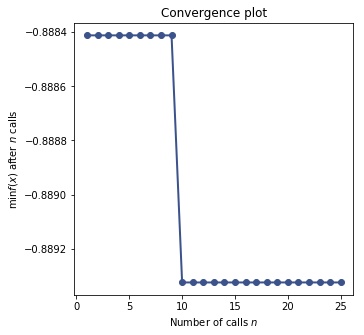

In [21]:
# Convergence plot
from skopt.plots import plot_convergence

plt.figure(figsize=(5,5))
plot_convergence(res_gp)
plt.grid()
plt.show()

In [23]:
# Train final model and report accuracy on validation and test sets
from sklearn.metrics import accuracy_score

mlp_opt = MLPClassifier(random_state=random_state,
                        hidden_layer_sizes = (res_gp.x[0],),
                        alpha=res_gp.x[1])
mlp_opt.fit(X_train_sc,y_train)
print("Classification accuracy on validation set: {:.3f}".format(accuracy_score(y_val, mlp_opt.predict(X_val_sc))))
print("Classification accuracy on test set: {:.3f}".format(accuracy_score(y_test, mlp_opt.predict(X_test_sc))))

Classification accuracy on validation set: 0.901
Classification accuracy on test set: 0.899


C:\Users\jsmyt\Anaconda3\envs\dme_project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
# Train final model and report accuracy on validation and test sets
from sklearn.metrics import accuracy_score

mlp_opt = MLPClassifier(random_state=random_state,
                        hidden_layer_sizes = (res_gp.x[0],),
                        alpha=res_gp.x[1])
mlp_opt.fit(bwe_data_train,y_train)
print("Classification accuracy on validation set: {:.3f}".format(accuracy_score(y_val, mlp_opt.predict(bwe_data_val))))
print("Classification accuracy on test set: {:.3f}".format(accuracy_score(y_test, mlp_opt.predict(bwe_data_test))))

Classification accuracy on validation set: 0.899
Classification accuracy on test set: 0.904


C:\Users\jsmyt\Anaconda3\envs\dme_project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
